# **Membrane Technology Data Analysis Project**
### *Step 1: Import Required Libraries and Load Dataset*
In this step, we will:
- Import all the necessary Python libraries.
- Load the `.xlsx` Excel dataset into a pandas DataFrame.
- View the first few rows of the data to understand its structure.


In [12]:
# Importing necessary libraries
import pandas as pd      # For data handling
import numpy as np       # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns    # For data visualization

# Load the Excel dataset
file_path = 'TFC_NF_membrane_data.xlsx'  # Make sure this file is in the same directory as your notebook
data = pd.read_excel(file_path)

# Check the first 5 rows of the dataset
data.head()


,Type,Size (nm),Shape,Pore size (Ǻ),Bond-ing*,Char-ge,"Phase**,",Loading,RR,RCA,CWP,CSP,RWP,RSP
0,NaN,NaN,NaN,NaN,NaN,"(+, -, 0)",A or O,NaN,NaN,NaN,(LMH/bar),(%),NaN,NaN
1,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00004,1.015,0.903,0.767,6.5,1.023,0.892
2,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00010,0.956,0.857,0.767,6.5,1.174,0.908
3,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00040,0.931,0.824,0.767,6.5,1.343,0.892
4,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00100,0.952,0.713,0.767,6.5,1.488,0.969


### *Step 2: Dataset Overview and Initial Cleaning*
- Check column names for any irregularities or unnecessary characters.
- Check for missing values.
- Review data types to ensure they are appropriate.


In [15]:
# View the column names
data.columns

# Check for missing values
data.isnull().sum()

# Check data types of each column
data.dtypes


Type              object
Size (nm)        float64
Shape             object
Pore size (Ǻ)    float64
Bond-ing*        float64
Char-ge           object
Phase**,          object
Loading          float64
RR               float64
RCA              float64
CWP               object
CSP               object
RWP              float64
RSP              float64
dtype: object

### *Step 3: Clean Column Names and Data Types*
- We will clean the column names by removing special characters and spaces.
- Convert columns `CWP` and `CSP` to numeric (if they contain unwanted characters).
- Re-check the data.


In [18]:
# Clean column names
data.rename(columns={
    'Type': 'Type',
    'Size (nm)': 'Size_nm',
    'Shape': 'Shape',
    'Pore size (Ǻ)': 'Pore_size_A',
    'Bond-ing*': 'Bonding',
    'Char-ge': 'Charge',
    'Phase**,': 'Phase',
    'Loading': 'Loading',
    'RR': 'RR',
    'RCA': 'RCA',
    'CWP': 'CWP',
    'CSP': 'CSP',
    'RWP': 'RWP',
    'RSP': 'RSP'
}, inplace=True)

# If CWP and CSP are strings with commas or other characters, convert to numeric
data['CWP'] = pd.to_numeric(data['CWP'], errors='coerce')
data['CSP'] = pd.to_numeric(data['CSP'], errors='coerce')

# Check again
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         188 non-null    object 
 1   Size_nm      188 non-null    float64
 2   Shape        188 non-null    object 
 3   Pore_size_A  188 non-null    float64
 4   Bonding      188 non-null    float64
 5   Charge       189 non-null    object 
 6   Phase        189 non-null    object 
 7   Loading      188 non-null    float64
 8   RR           78 non-null     float64
 9   RCA          134 non-null    float64
 10  CWP          188 non-null    float64
 11  CSP          188 non-null    float64
 12  RWP          188 non-null    float64
 13  RSP          188 non-null    float64
dtypes: float64(10), object(4)
memory usage: 20.8+ KB


,Type,Size_nm,Shape,Pore_size_A,Bonding,Charge,Phase,Loading,RR,RCA,CWP,CSP,RWP,RSP
0,NaN,NaN,NaN,NaN,NaN,"(+, -, 0)",A or O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00004,1.015,0.903,0.767,6.5,1.023,0.892
2,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00010,0.956,0.857,0.767,6.5,1.174,0.908
3,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00040,0.931,0.824,0.767,6.5,1.343,0.892
4,NaA zeolite,100.0,Spherical,4.0,0.0,-,A,0.00100,0.952,0.713,0.767,6.5,1.488,0.969


## Step 4: Data Cleaning & Initial Exploratory Data Analysis (EDA)

- Remove the first row with NaNs (artifact row).
- Check missing values.
- Plot distributions of outputs (CWP and CSP).
- Plot correlation matrix to understand relationships.


Missing values in each column:
 Type             0
Size_nm          0
Shape            0
Pore_size_A      0
Bonding          0
Charge           0
Phase            0
Loading          0
RR             110
RCA             54
CWP              0
CSP              0
RWP              0
RSP              0
dtype: int64


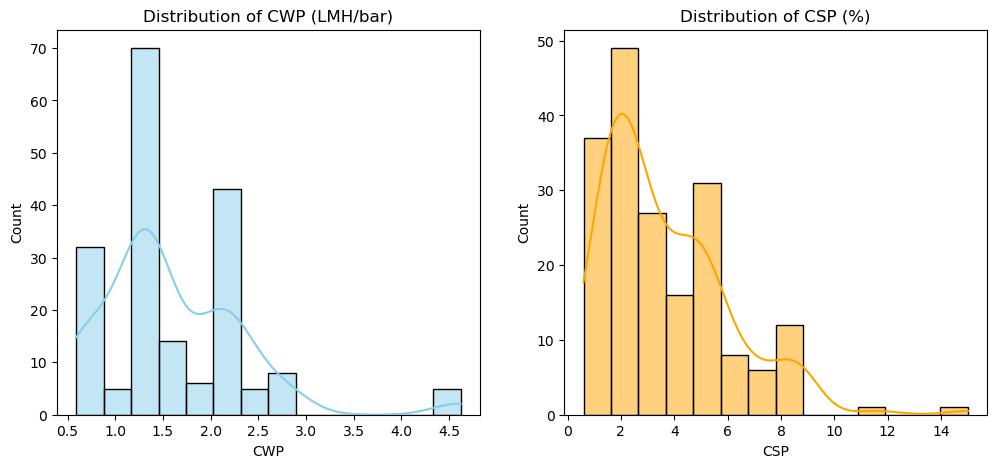

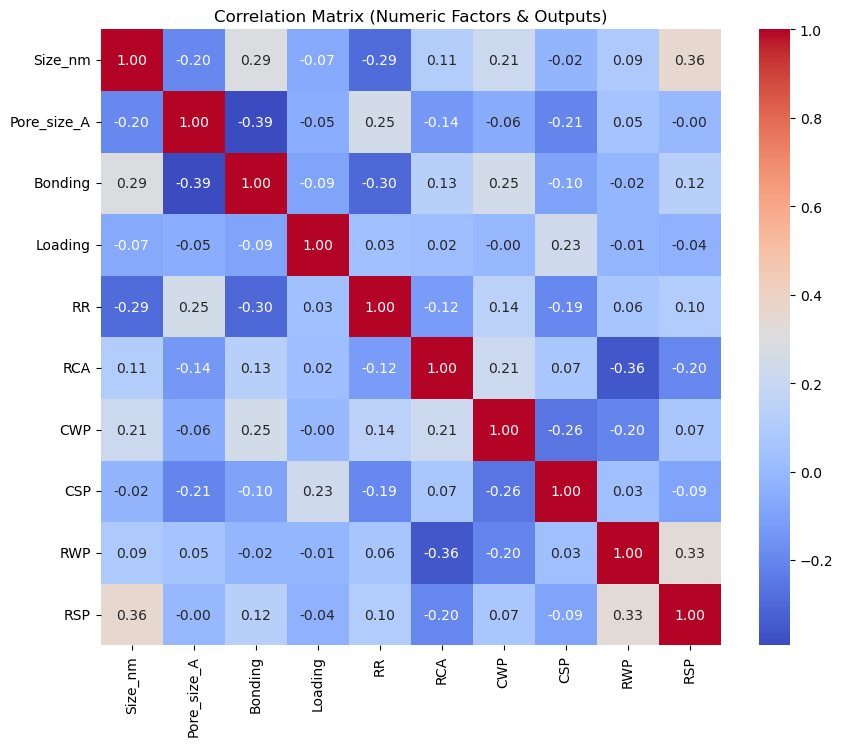

In [21]:
# Remove row with all NaNs (index 0)
data_cleaned = data.drop(index=0).reset_index(drop=True)

# Check missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Plot distribution of outputs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data_cleaned['CWP'], kde=True, color='skyblue')
plt.title('Distribution of CWP (LMH/bar)')

plt.subplot(1,2,2)
sns.histplot(data_cleaned['CSP'], kde=True, color='orange')
plt.title('Distribution of CSP (%)')

plt.show()

# Correlation heatmap (for numeric columns only)
plt.figure(figsize=(10,8))
numeric_data = data_cleaned.select_dtypes(include=['float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Factors & Outputs)')
plt.show()
